#Combining probabilities for the identification problem

Temo asked a question the other day that had me a bit stumped.

To summarise:

We have a binary vector $\mathbf{w}_i$ which is used to select the parameters of $\mathbf{x}$ to generate a response $r_i$:

$$r_i = \mathbf{w}_i^\top \mathbf{x} + e$$

$$r_i = N(\mathbf{w}_i^\top \mathbf{x},\sigma^2)$$

Our prior, $$\mathbf{x} \sim N(\mathbf{0},I)$$

Temo asked how to do we combine these, as $\mathbf{x}$ is n-dimensional, while $r_i$ are one-dimensional.

Drawing a graph, it sort of seems obvious what we want, but it's harder to see how to turn that into maths!

The prior:
<img src='images/prior.jpg'>

Let's assume that $\mathbf{w}_1 = [1,1]$ and $r_1 = 4$. We would expect the mode of the distribution to be along a line intersecting $[4,0]$ and $[0,4]$:

<img src='images/response.jpg'>

So we need to express the response probability distribution in terms of $\mathbf{x}$ for a given $(\mathbf{w_i},r_i)$.

To help think about it, we consider another example, with $\mathbf{w_1} = [1,1,0]$ and $r_1=4$. The mode of the distribution over $\mathbf{x}$ will be a plane passing through $[4,0,0]$ and $[0,4,0]$ and parallel with $x_3$:

<img src='images/plane.jpg'>

Can we write this as a Gaussian?

First where's the mean? It could be anywhere on that plane, as this is equal to the mode. For simplicity I'll pick the point nearest to the origin. In this case $[2,2,0]$, in general:


$$\mathbf{\mu} = {{r \mathbf{w}} \over {\mathbf{w}^\top \mathbf{w}}}$$

Where $\mathbf{w}^\top \mathbf{w}$ will give us the number of dimensions $w$ is non-zero. It might have been easier just to put the mean along one of the axes... anyway.

The covariance is a lot more tricky.

In this example it's going to be something like:

$$
\left(
\begin{array}{c}
\sim\;-s^2 & s^2 & 0\\
s^2 & \sim\;-s^2 & 0\\
0 & 0 & big\\
\end{array}
\right)$$

The "big" we can handle later, as it disappears (to about zero) when we invert the matrix.

It turns out the whole thing works out, let's put some more detail in and see.

First, we'll work with the inverse-covariance, as it makes things easier.

We want the variances of $x_1$ and $x_2$ to sum such that the total variance of $r$ will be $\sigma^2$. The covariance between $x_1$ and $x_2$ will be chosen such that they are completely dependent (we'll get to that), but the upshot is that the inverse-variance of the diagonals (where $w_i=1$) is $1/\sigma^2$, where $\sigma^2$ is the variance in the response value.

So we're just having to deal with the covariance between the $w_i=1$ terms. Let's make them slightly less than $1/\sigma^2$ by multiplying them by $\alpha=0.999$.

$$
\left(
\begin{array}{c}
1/\sigma^2 & \alpha/\sigma^2 & 0\\
\alpha/\sigma^2 & 1/\sigma^2 & 0\\
0 & 0 & \sim 0\\
\end{array}
\right)$$

Now let's continue with combining this with our prior:

$$
\left(
\begin{array}{c}
1/\sigma^2 & \alpha/\sigma^2 & 0\\
\alpha/\sigma^2 & 1/\sigma^2 & 0\\
0 & 0 & \sim 0\\
\end{array}
\right)
+
\left(
\begin{array}{c}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{array}
\right)
= 
\left(
\begin{array}{c}
1 + 1/\sigma^2 & \alpha/\sigma^2 & 0\\
\alpha/\sigma^2 & 1 + 1/\sigma^2 & 0\\
0 & 0 & \sim 1\\
\end{array}
\right)
$$

Now things look like they'll be stable, let's just make $\alpha=1$.

$$
\left(
\begin{array}{c}
1 + 1/\sigma^2 & 1/\sigma^2 & 0\\
1/\sigma^2 & 1 + 1/\sigma^2 & 0\\
0 & 0 & 1\\
\end{array}
\right)
$$

Let's make $\sigma^2=1$, we find that the covariance matrix is:

$$
\left(
\begin{array}{c}
2 & 1 & 0\\
1 & 2 & 0\\
0 & 0 & 1\\
\end{array}
\right)^{-1}
=
{{1}\over{3}}
\left(
\begin{array}{c}
2 & -1 & 0\\
-1 & 2 & 0\\
0 & 0 & 3\\
\end{array}
\right)
$$

Let's find the new mean:

$$\mu_{new} = \Sigma_{new} \Sigma_a^{-1} \mu_a +  \Sigma_{new} \Sigma_{prior}^{-1} \mu_{prior}$$

$\mu_{prior}=0$, so this leaves:

$$\mathbf{\mu} = {{1}\over{3}}
\left(
\begin{array}{c}
2 & -1 & 0\\
-1 & 2 & 0\\
0 & 0 & 3\\
\end{array}
\right)
\times
\left(
\begin{array}{c}
1 & 1 & 0\\
1 & 1 & 0\\
0 & 0 & 0\\
\end{array}
\right)
\times
\left(
\begin{array}{c}
2\\
2\\
0\\
\end{array}
\right)
=
\left(
\begin{array}{c}
4/3\\
4/3\\
0\\
\end{array}
\right)
$$

To illustrate this in two dimensions:

(-4, 4)

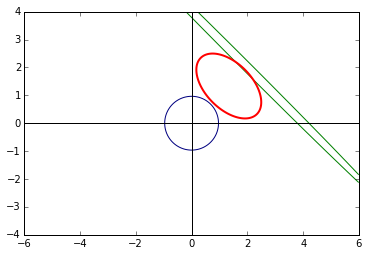

In [109]:
import numpy as np
from scipy.stats import multivariate_normal
p = multivariate_normal(mean=np.array([0.,0.]),cov=np.array([[1.,0],[0,1.]]))
q = multivariate_normal(mean=np.array([2.,2.]),cov=np.array([[1.,-0.999],[-0.999,1.]]))
r = multivariate_normal(mean=np.array([4./3.,4./3.]),cov=np.array([[2./3.,-1./3.],[-1./3.,2./3.]]))
x, y = np.mgrid[-6:6:.01, -4:4:.01]
pos = np.dstack((x, y))
import matplotlib.pyplot as plt
%matplotlib inline
plt.contour(x, y, p.pdf(pos),[0.1])
plt.contour(x, y, q.pdf(pos),[0.00001],colors='green')
plt.contour(x, y, r.pdf(pos),[0.1],colors='red',linewidths=2)
plt.axes().set_aspect('equal', 'datalim')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-4,4])
plt.ylim([-4,4])

The prior is in blue, the response-associated distribution is in green and the new posterior distribution is in red. In this example, the prior should probably have larger values in its covariance matrix, as it seems to be dragging the posterior to the origin too much.

I wonder if this is the right approach.

Hope it makes sense!

Mike.

###Addendum

I need to include the neater way of working this out, purely algebraically, [add here...]